<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/AssociationRules/AssociationRuleLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rule Learning Practical Class

This is the practical class on association rule learning in R. In this case, we will select telemarketers based on personality criteria and demographic data to answer the question of what makes a good telemarketer. Meaning, which one we can hire without fear of regretting it later. 

First, we load the data and the library $arules$ which we will use for creating association rules. 

In [14]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(arules)

In [22]:
h <- read.csv('candidatos.csv',sep=',')

In [23]:
head(h)

,X,Id,Apellido,Nombre,Propio,Padre,Madre,PIngFam,IngFam,Hijos,⋯,Conciente,Espiritual,Impulsivo,Desordenado,Temeroso,Vago,Apego,Empatia,Compasivo,VxH
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001,2001,IEEDT,HXNNE,P,S,U,0.63543626,24067.7992,3,⋯,0.66820965,0.0712635,0.4320820,0.6290097,0.6371866,0.4142663,0.9931040,0.6354392,0.3917132,0.6680559
2,2002,2002,QBGGM,EFSDQ,S,S,S,0.04048093,888.6913,0,⋯,0.01280303,0.8834866,0.6356267,0.5468446,0.1612755,0.9786670,0.7558528,0.7264911,0.4026891,0.5772992
3,2003,2003,HYTBY,OXHIO,P,P,P,0.83330052,9538.7510,3,⋯,0.68629221,0.7884684,0.7590972,0.3675028,0.9329197,0.7309785,0.7376015,0.6763783,0.5326494,0.6649263
4,2004,2004,YGBVR,NROUL,P,P,S,0.05665509,36689.7745,0,⋯,0.38174567,0.4943618,0.5358783,0.8752060,0.4391167,0.0367856,0.4507340,0.7834669,0.3943883,0.4975534
5,2005,2005,GBKJI,XBTPE,U,U,S,0.87843791,15619.1058,0,⋯,0.17559079,0.4795508,0.5323704,0.2934754,0.3472154,0.6083721,0.5479184,0.7309708,0.6152700,0.6783669
6,2006,2006,TTYAA,LVRFW,S,P,P,0.38670005,18460.1819,4,⋯,0.24953534,0.3831869,0.9662643,0.6909347,0.8445829,0.4935160,0.1555895,0.3283420,0.3285059,0.9715845


In [24]:
str(h)

'data.frame':	8001 obs. of  31 variables:
 $ X           : int  2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 ...
 $ Id          : int  2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 ...
 $ Apellido    : chr  "IEEDT" "QBGGM" "HYTBY" "YGBVR" ...
 $ Nombre      : chr  "HXNNE" "EFSDQ" "OXHIO" "NROUL" ...
 $ Propio      : chr  "P" "S" "P" "P" ...
 $ Padre       : chr  "S" "S" "P" "P" ...
 $ Madre       : chr  "U" "S" "P" "S" ...
 $ PIngFam     : num  0.6354 0.0405 0.8333 0.0567 0.8784 ...
 $ IngFam      : num  24068 889 9539 36690 15619 ...
 $ Hijos       : int  3 0 3 0 0 4 0 0 3 0 ...
 $ Exitable    : num  0.77 0.19 0.717 0.924 0.166 ...
 $ Extravagante: num  0.6502 0.3506 0.3672 0.0615 0.8331 ...
 $ Pesimista   : num  0.2289 0.8741 0.0403 0.726 0.6591 ...
 $ Timido      : num  0.839029 0.815702 0.000757 0.969466 0.711536 ...
 $ Sentimental : num  0.773 0.86 0.577 0.412 0.952 ...
 $ Dependiente : num  0.771 0.00442 0.14761 0.50521 0.08016 ...
 $ Responsable : num  0.309 0.956 0.748

First, we have to discretize some of the variables, since we will use a method that goes from categorical data to categorical data. This is the discretize method in R which allows us to go from numeric to categorical data. A few errors arise because of the outdated use of the function in class. 

In [25]:
h$PIngFam <- discretize(h$PIngFam,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Exitable <- discretize(h$Exitable,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Extravagante <- discretize(h$Extravagante,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Pesimista <- discretize(h$Pesimista,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Timido <- discretize(h$Timido,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Sentimental <- discretize(h$Sentimental,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Dependiente <- discretize(h$Dependiente,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Responsable <- discretize(h$Responsable,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Capaz <- discretize(h$Capaz,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Sociable <- discretize(h$Sociable,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Servicial <- discretize(h$Servicial,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Etico <- discretize(h$Etico,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Conciente <- discretize(h$Conciente,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Espiritual <- discretize(h$Espiritual,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Impulsivo <- discretize(h$Impulsivo,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Desordenado <- discretize(h$Desordenado,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Temeroso <- discretize(h$Temeroso,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Vago <- discretize(h$Vago,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Apego <- discretize(h$Apego,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Empatia <- discretize(h$Empatia,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')
h$Compasivo <- discretize(h$Compasivo,categories=c(0,.2,.4,.6,.8,1.0),method='fixed')

Warning message in discretize(h$PIngFam, categories = c(0, 0.2, 0.4, 0.6, 0.8, 1), :
“Parameter categories is deprecated. Use breaks instead! Also, the default method is now frequency!”
Warning message in discretize(h$Exitable, categories = c(0, 0.2, 0.4, 0.6, 0.8, :
“Parameter categories is deprecated. Use breaks instead! Also, the default method is now frequency!”
Warning message in discretize(h$Extravagante, categories = c(0, 0.2, 0.4, 0.6, 0.8, :
“Parameter categories is deprecated. Use breaks instead! Also, the default method is now frequency!”
Warning message in discretize(h$Pesimista, categories = c(0, 0.2, 0.4, 0.6, 0.8, :
“Parameter categories is deprecated. Use breaks instead! Also, the default method is now frequency!”
Warning message in discretize(h$Timido, categories = c(0, 0.2, 0.4, 0.6, 0.8, 1), :
“Parameter categories is deprecated. Use breaks instead! Also, the default method is now frequency!”
Warning message in discretize(h$Sentimental, categories = c(0, 0.2, 0.4, 0.

In [26]:
h$Hijos <- discretize(h$Hijos,categories=c(0,1,2,3,4,5,6),method='fixed')

Warning message in discretize(h$Hijos, categories = c(0, 1, 2, 3, 4, 5, 6), method = "fixed"):
“Parameter categories is deprecated. Use breaks instead! Also, the default method is now frequency!”


In [27]:
h$IngFam <- discretize(h$IngFam,breaks=5)

Now we organize the output with the VxH attribute, which indicates how much a person sells per call. 

In [29]:
aceptable <- ifelse(h$VxH >= 0.75,1,0)
h <- cbind(h,aceptable)
h$aceptable <- as.factor(h$aceptable)

Now we will eliminate everything we will not use. 

In [30]:
h$VxH <- NULL
h$X <- NULL
h$Id <- NULL
h$Nombre <- NULL
h$Apellido <- NULL

And now we divide into train and test datasets.

In [31]:
x <- runif(nrow(h))
htrain <- h[which(x<0.7),]
htest <- h[which(x >= 0.7),]

Now we will finally train the association rules using the apriori algorithm. We will select rules that are more than 4% of cases and with a confidence of 75% for the aceptable attribute. 

In [32]:
reglas <- apriori(htrain,parameter=list(support=0.04,confidence=0.75),appearance = list(rhs=c("aceptable=1","aceptable=0")))

Warning message:
“Column(s) 1, 2, 3 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5    0.04      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 223 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[126 item(s), 5592 transaction(s)] done [0.01s].
sorting and recoding items ... [126 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.07s].
writing ... [1882 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Now after doing that, we will order by confidence level, and visualize the association rules. We encounter a huge problem, which is that we haven't produced any rules with aceptable = 1. That means, we have not found rules to actually employ people. This is because there are very few people who are good at their job. Before, we have been employing mostly people who aren't nice for the task at hand. 

In [33]:
reglas <- sort(reglas,by='confidence',decreasing = TRUE)

In [35]:
r <- DATAFRAME(reglas)

In [37]:
r

,LHS,RHS,support,confidence,coverage,lift,count
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1439,"{Propio=P,Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.06419886,0.9917127,0.06473534,1.199320,359
1436,"{Padre=P,Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.06402003,0.9916898,0.06455651,1.199293,358
1433,"{Padre=S,Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.05078684,0.9861111,0.05150215,1.192546,284
1034,"{Propio=P,Hijos=[0,1),Espiritual=[0.6,0.8)}",{aceptable=0},0.05919170,0.9851190,0.06008584,1.191346,331
970,"{Propio=P,Hijos=[0,1),Espiritual=[0.8,1]}",{aceptable=0},0.06706009,0.9842520,0.06813305,1.190298,375
1554,"{Propio=P,Hijos=[0,1),Temeroso=[0.8,1]}",{aceptable=0},0.06652361,0.9815303,0.06777539,1.187006,372
964,"{Padre=S,Hijos=[0,1),Espiritual=[0.8,1]}",{aceptable=0},0.04524320,0.9806202,0.04613734,1.185906,253
1844,"{Padre=P,Hijos=[0,1),Etico=[0.8,1]}",{aceptable=0},0.06902718,0.9796954,0.07045780,1.184787,386
1847,"{Propio=P,Hijos=[0,1),Etico=[0.8,1]}",{aceptable=0},0.07349785,0.9785714,0.07510730,1.183428,411


In [38]:
table(r$RHS)


{aceptable=0} 
         1882 

What should we do now, then? The first option is relaxing our parameters, maybe we're asking too much. We are going to ask for a 0.01 support, and we will also just ask for the rules with aceptable = 1. 

In [40]:
reglas2 <- apriori(htrain,parameter=list(support=0.01,confidence=0.75),appearance = list(rhs=c("aceptable=1")))

Warning message:
“Column(s) 1, 2, 3 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 55 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[126 item(s), 5592 transaction(s)] done [0.01s].
sorting and recoding items ... [126 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.75s].
writing ... [1 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


In [41]:
r2 <- DATAFRAME(reglas2)

In [42]:
r2

,LHS,RHS,support,confidence,coverage,lift,count
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,"{Propio=S,Hijos=[4,5)}",{aceptable=1},0.01251788,0.7608696,0.01645207,4.399982,70


That is just want rule. But we want more. What is something else we could do? 

The same we did with decision trees, we are going to balance the classes. 

In [43]:
table(h$aceptable)


   0    1 
6582 1418 

In [49]:
hno <- h[which(h$aceptable == 0),] 
hyes <- h[which(h$aceptable == 1),]
x <- runif(nrow(hno))
hnof <- hno[which(x<0.25),]

In [50]:
hnew <- rbind(hyes,hnof)

In [51]:
table(hnew$aceptable)


   0    1 
1663 1418 

Now we split into train and test again. 

In [52]:
x <- runif(nrow(hnew))
hnewtrain <- hnew[which(x<0.7),]
hnewtest <- hnew[which(x >= 0.7),]

And now we can construct our rules again.

In [53]:
reglas3 <- apriori(hnewtrain,parameter=list(support=0.04,confidence=0.75),appearance = list(rhs=c("aceptable=1","aceptable=0")))

Warning message:
“Column(s) 1, 2, 3 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5    0.04      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[126 item(s), 2182 transaction(s)] done [0.01s].
sorting and recoding items ... [126 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.03s].
writing ... [122 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [54]:
reglas3 <- sort(reglas3,by='confidence',decreasing = TRUE)

In [55]:
r3 <- DATAFRAME(reglas3)

In [56]:
r3

,LHS,RHS,support,confidence,coverage,lift,count
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
40,"{Propio=P,Hijos=[0,1),Espiritual=[0.8,1]}",{aceptable=0},0.04032997,0.9462366,0.04262145,1.798509,88
41,"{Propio=P,Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.04032997,0.9462366,0.04262145,1.798509,88
42,"{Padre=P,Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.04307974,0.9400000,0.04582951,1.786655,94
43,"{Madre=P,Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.04582951,0.9345794,0.04903758,1.776352,100
45,"{Padre=P,Hijos=[0,1),Etico=[0.8,1]}",{aceptable=0},0.04124656,0.9278351,0.04445463,1.763533,90
44,"{Propio=P,Hijos=[0,1),Etico=[0.8,1]}",{aceptable=0},0.04491292,0.9158879,0.04903758,1.740825,98
47,"{Propio=P,Hijos=[0,1),Temeroso=[0.8,1]}",{aceptable=0},0.04537122,0.9082569,0.04995417,1.726321,99
11,"{Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.08340972,0.9054726,0.09211732,1.721029,182
63,"{Propio=P,Hijos=[0,1),Servicial=[0,0.2)}",{aceptable=0},0.04353804,0.8962264,0.04857929,1.703455,95


In [57]:
table(r3$RHS)


{aceptable=0} {aceptable=1} 
          114             8 

Let's visualise the aceptable = 1 ones. 

In [59]:
r3_aceptables = r3[which(r3$RHS == "{aceptable=1}"),]
r3_noaceptables = r3[which(r3$RHS == "{aceptable=0}"),]

In [61]:
r3_aceptables

,LHS,RHS,support,confidence,coverage,lift,count
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,"{Padre=P,Hijos=[4,5)}",{aceptable=1},0.04170486,0.8834951,0.04720440,1.864397,91
1,"{Hijos=[4,5)}",{aceptable=1},0.08478460,0.8767773,0.09670027,1.850220,185
16,"{Padre=U,Timido=[0,0.2)}",{aceptable=1},0.04032997,0.8543689,0.04720440,1.802933,88
3,"{Madre=P,Hijos=[4,5)}",{aceptable=1},0.04124656,0.8490566,0.04857929,1.791723,90
17,"{Propio=S,Padre=U}",{aceptable=1},0.06507791,0.8022599,0.08111824,1.692970,142
34,"{Timido=[0,0.2),Temeroso=[0,0.2)}",{aceptable=1},0.04124656,0.7826087,0.05270394,1.651501,90
36,"{Timido=[0,0.2),Espiritual=[0,0.2)}",{aceptable=1},0.05453712,0.7628205,0.07149404,1.609743,119
35,"{Etico=[0,0.2),Espiritual=[0,0.2)}",{aceptable=1},0.04491292,0.7538462,0.05957837,1.590805,98


And now some from the aceptable = 0 list. 

In [62]:
head(r3_noaceptables)

,LHS,RHS,support,confidence,coverage,lift,count
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
40,"{Propio=P,Hijos=[0,1),Espiritual=[0.8,1]}",{aceptable=0},0.04032997,0.9462366,0.04262145,1.798509,88
41,"{Propio=P,Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.04032997,0.9462366,0.04262145,1.798509,88
42,"{Padre=P,Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.04307974,0.9400000,0.04582951,1.786655,94
43,"{Madre=P,Hijos=[0,1),Timido=[0.8,1]}",{aceptable=0},0.04582951,0.9345794,0.04903758,1.776352,100
45,"{Padre=P,Hijos=[0,1),Etico=[0.8,1]}",{aceptable=0},0.04124656,0.9278351,0.04445463,1.763533,90
44,"{Propio=P,Hijos=[0,1),Etico=[0.8,1]}",{aceptable=0},0.04491292,0.9158879,0.04903758,1.740825,98


Now we have to do the testing! Seeing how this very beautiful rules perform. We will use the test dataset and see how many rules they actually fulfill.

In [63]:

## desarmo la regla en partes

parteReglas <- function(r)
{
x <- substring(r,2,nchar(r)-1)
## reemplazo las comas que no están entre []() por |
fuera = TRUE
for(i in 1:nchar(x))
{
if(substring(x,i,i)=="[")
{
fuera = FALSE
}
if(substring(x,i,i)==")" )
{
fuera = TRUE
}
if(fuera & substring(x,i,i) == ",")
{
x <- paste(substring(x,1,i-1),"|",substring(x,i+1,nchar(x)), sep="")
x
}
}
y <- read.table(text = x,sep = "|", colClasses = "character")
y <- t(y)
z <- matrix(nrow = nrow(y), ncol = 2, "")
for(i in 1:length(y))
{
w <- t(read.table(text=y[i],sep = "=", colClasses = "character"))
z[i,1] <- w[1]
z[i,2] <- w[2]
}
z
}


cmp <- function(reglas,casos)
{
## recorro los casos con k
cumplimiento <- vector(length = nrow(casos), "numeric")
for(k in 1:nrow(casos))
{
## recorro las reglas con j
v.r <- as.vector(reglas$LHS)
for(j in 1:length(v.r))
{
cumple <- TRUE
## recorro los términos w de la regla con i
ww <- parteReglas(as.vector(reglas[j,]$LHS))
for(i in 1:nrow(ww))
{
if(casos[k,which(colnames(casos)==ww[i,1])] == ww[i,2])
{
cumple <- cumple & TRUE
}
else
{
cumple <- FALSE
}
}
if(cumple)
{
## sumo 1 al vector de cumplimento de los prospectos
cumplimiento[k] <- cumplimiento[k]+1
}
}
}
cumplimiento
}

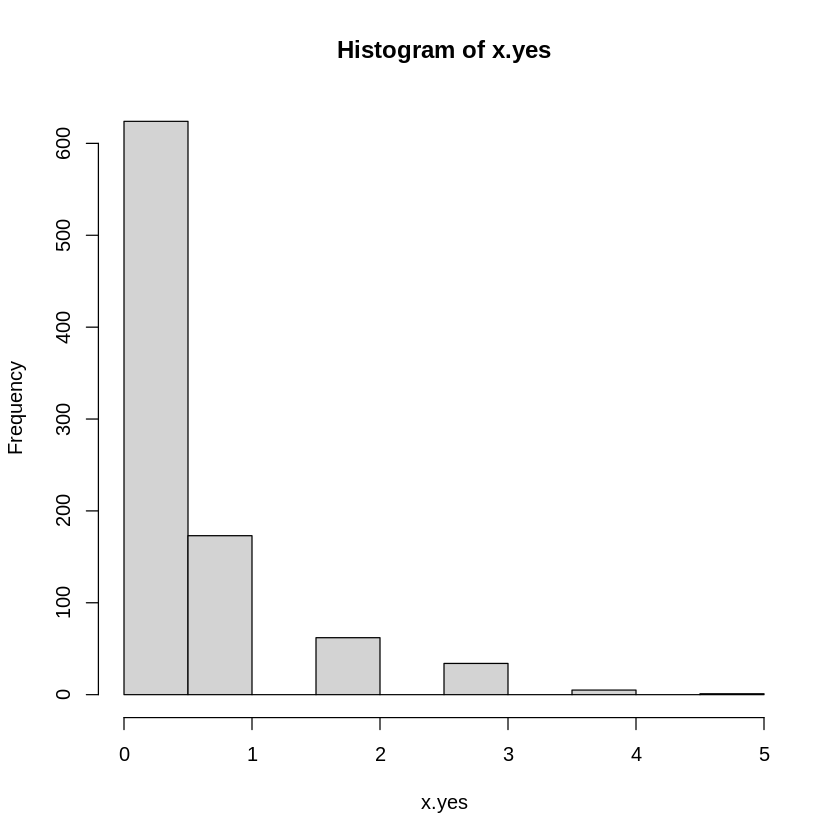

In [66]:
x.yes <- cmp(r3_aceptables,hnewtest)
hist(x.yes)

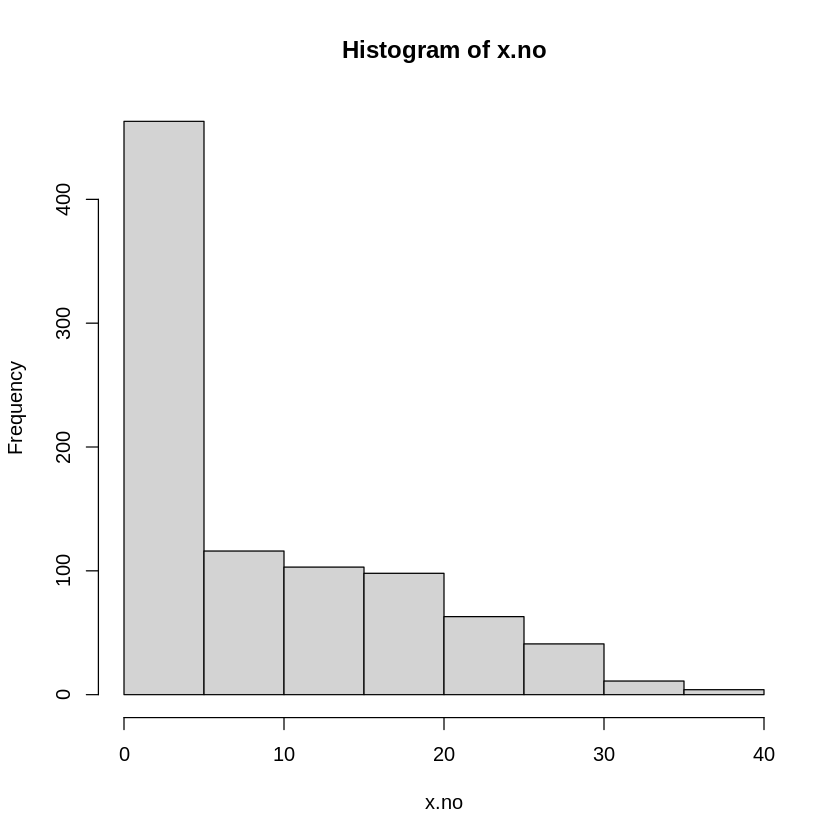

In [67]:
x.no <- cmp(r3_noaceptables,hnewtest)
hist(x.no)

Now, having calculated how many good and bad rules each employees on the test database fulfills, we will calculate the difference. This difference could tells us if it is worth employing this person: if the advantages outweigth the disadvantages or not. 

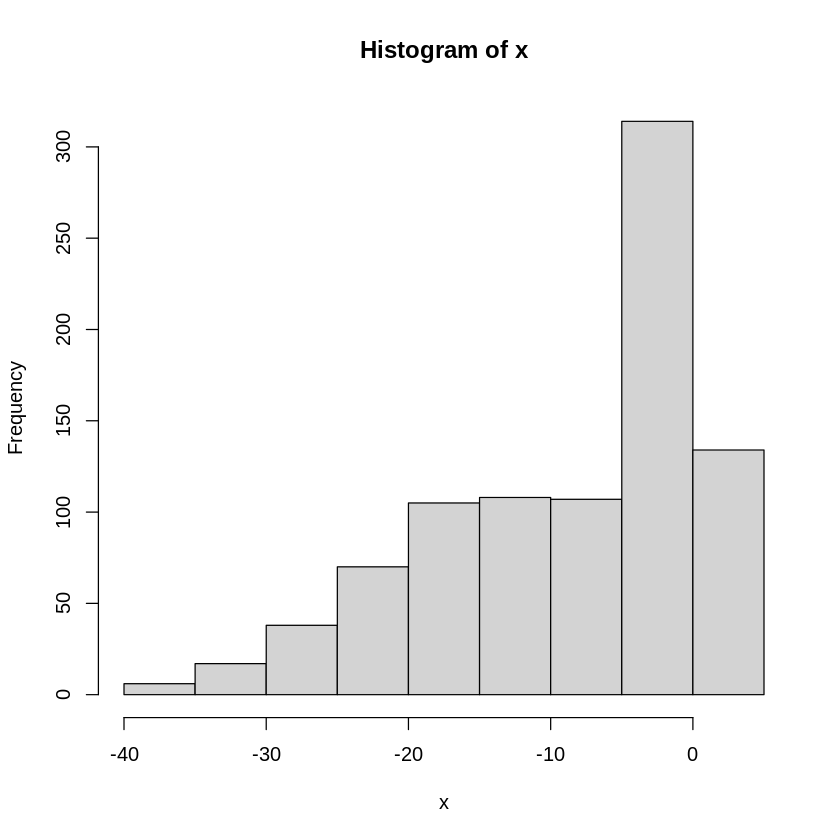

In [68]:
x <- x.yes - x.no
hist(x)

Next up, to calculate the value of this algorithm, we will make a cost-benefit assesment. Meaning, we will value each of the 4 possible cases as following:
- True Positive (good rules, good employee): $30000

- True Negative (bad rules, bad employee): $0

- False Positive (good rules, bad employee): -$60000

- False Negative (bad rules, good employee): $0

In [72]:
TP <- length(which(x>2&hnewtest$aceptable==1))
TN <- length(which(x<=2&hnewtest$aceptable==0))
FP <-length(which(x>2&hnewtest$aceptable==0))
FN <- length(which(x<=2&hnewtest$aceptable==1))

In [73]:
VTP <- 30000
VTN <- 0
VFP <- -60000
VFN <- 0

In [74]:
value <- TP*VTP + VTN * 4 * TN + FP * 4 * VFP + FN * VFN

In [75]:
value

[1] 780000

Now we compare against our current HR strategy. Currently, we are losing a lot of money. Our rules strategy would help us make some profit and stop losing our capital. We, as data scientists, are adding a lot of value to the business. 

In [76]:
value_current = VTP * length(which(hnewtest$aceptable == 1)) + VFP * length(which(hnewtest$aceptable == 0))

In [77]:
value_current

[1] -19380000

Can we improve? Let's try with 3,4,5 rules, and see what is up. I leave only one illustrative case.

In [84]:
TP <- length(which(x>1&hnewtest$aceptable==1))
TN <- length(which(x<=1&hnewtest$aceptable==0))
FP <-length(which(x>1&hnewtest$aceptable==0))
FN <- length(which(x<=1&hnewtest$aceptable==1))

In [85]:
value <- TP*VTP + VTN * 4 * TN + FP * 4 * VFP + FN * VFN

In [86]:
value

[1] 420000

Another nice quantity to compare to is the perfect algorithm. This, like we said in decision trees, allows us to gauge how much we can actually improve with this framework.

In [91]:
value_perfect = VTP * length(which(hnewtest$aceptable == 1))

In [92]:
value_perfect

[1] 11520000

We can also see TP and FP, to see how many good and bad people we are employing. In this case, very few employees are bad. 

In [87]:
TP

[1] 54

In [88]:
FP

[1] 5